# Triángulo de Sierpiński

Es un fractal formado con triángulos equiláteros (véase [Wikipedia](https://en.m.wikipedia.org/wiki/Sierpi%C5%84ski_triangle))

In [182]:
import numpy as np
import matplotlib.pyplot as plt

### Definición funciones para el triángulo equilátero

Para definir el triángulo equilátero, utilizaremos tres funciones: $f_1(x)=0, \; f_2(x)=\sqrt{3}\,x\,\text{ y }\;f_3(x)=-\sqrt{3}(x-1)$. Al muestrear un punto aleatorio $(x,y)$, en el cuadrado unitario, podemos revisar si el punto está dentrosi verifica el sistema de desigualdades:
$$\begin{pmatrix} \sqrt{3} & 1 \\ -\sqrt{3} & 1 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} - \begin{pmatrix} \sqrt{3} \\ 0 \\ 0 \end{pmatrix} \leq \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$$

In [189]:
A = np.array([[np.sqrt(3), 1], [-np.sqrt(3), 1], [0, -1]])
b = np.array([np.sqrt(3), 0, 0])[:, None]

In [187]:
A

array([[ 1.73205081,  1.        ],
       [-1.73205081,  1.        ],
       [ 0.        , -1.        ]])

In [188]:
b

array([[1.73205081],
       [0.        ],
       [0.        ]])

## Vértices

Definimos una matriz de vértices, de la cual tomaremos uno aleatorio con el método mostrado más adelante.

In [190]:
V = np.array([[0, 0], [1, 0], [1/2, np.sqrt(3)/2]])
V.shape

(3, 2)

In [191]:
V

array([[0.       , 0.       ],
       [1.       , 0.       ],
       [0.5      , 0.8660254]])

## Ejemplo de número y verificación 

In [185]:
V = np.array([[0, 0], [1, 0], [1/2, np.sqrt(3)/2]])
V.shape

(3, 2)

In [200]:
x = np.array([0.5, 0.5])[:, None]
np.matmul(A,x)-b

array([[-0.3660254],
       [-0.3660254],
       [-0.5      ]])

In [204]:
x = np.random.rand(2, 1)
np.matmul(A,x)-b

array([[-0.375687  ],
       [-0.49397941],
       [-0.4311922 ]])

In [205]:
np.all(np.matmul(A,x)-b < 0)

True

In [201]:
np.all(np.matmul(A,x)-b < 0)

True

In [206]:
obtener_punto()

array([[0.78529192],
       [0.04426062]])

## *Chaos game*

Una forma de obtener el triángulo de Sierpiński es utilizar el juego del caos (véase [Wikipedia](https://en.m.wikipedia.org/wiki/Chaos_game))

In [46]:
def obtener_punto():
    while True:
        x = np.random.rand(2,1)
        # Verificar que está dentro del triángulo
        if np.all(np.matmul(A,x)-b < 0):
            return x


In [226]:
N = 10_000
r = 1/2
np.random.seed(0)

x0 = obtener_punto()
x = x0
puntos = x0

for i in range(N):
    # Obtener un vértice aleatorio
    n_vert = np.random.randint(3)
    vert = V[n_vert, :, None]
    # Obtener el nuevo punto
    x = x + r*(vert - x)
    puntos = np.concatenate((puntos, x), axis=1)

(0.0, 0.8660254037844386)

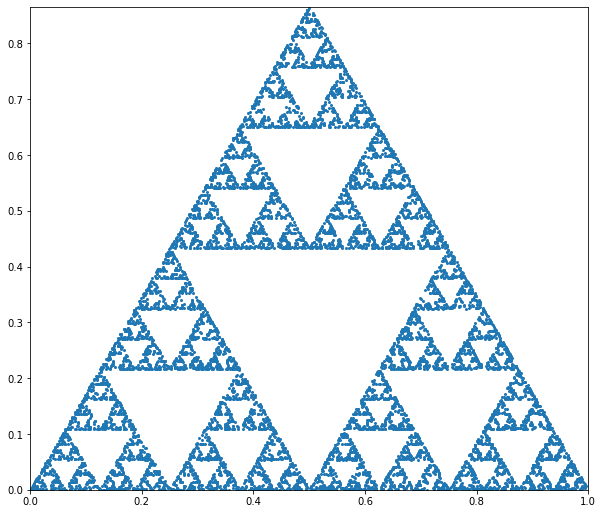

In [227]:
# Graficar
x = puntos[0, :]
y = puntos[1, :]
plt.figure(figsize=(10,10))
plt.plot(x, y, 'o', markersize=2)
plt.axes().set_aspect('equal')
plt.xlim((0, 1))
plt.ylim((0, np.sqrt(3)/2))
